# Car price prediction using multiple machine learning models

### Predicting Description:

> **We are predicting the selling price of the car based on various features of the cars, including the present price of the cars. I will be using Multiple Linear Regression for building The model.**

 **Data Description:**
 
     This dataset contains information about cars listed on the website OLX.in

### Source:

> **Kaggle Data Science Community**

**Attribute Information:**
    
    The datasets consist of several independent variables include:
    -------------------------------------------------------------------------------------
        
        * Name              :  Name of the Car
        _________________________________________________________________________________
        
        * Company Name      :  Comapny Name of the Car
        _________________________________________________________________________________
        
        * Year              :  Purchased Year
        _________________________________________________________________________________
         
        * Selling Price     :  The price for each car
        _________________________________________________________________________________
        
        * KM_driven         :  Total Kilo Meters driven by each car
        _________________________________________________________________________________
        
        * Fuel              :  Fuel Type (Petrol/Diesel/LPG/CNG)
        _________________________________________________________________________________
        
        * Seller_type       :  Defines whether the seller is a dealer or an individual.
        _________________________________________________________________________________
        
        * Transmission      :  Defines if the car is automatic or Manual 
        _________________________________________________________________________________
                 
        * Owner             :  If the seller is first owner or second owner etc..
        _________________________________________________________________________________
        
        * Mileage           :  Shows how much mileage the car gives
        _________________________________________________________________________________
        
        * Engine            :  Defines the Cubic capacity of the Engine.
        _________________________________________________________________________________
        
        * Max_Power         :  Defines the power of the Engine measured in bhp
        _________________________________________________________________________________
        
        * Seats             :  Number of seats

#### Importing libraries

In [1]:
import pandas as pd                    
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

#### Reading CSV file

In [2]:
df = pd.read_csv("Cars1.csv")

**First five rows of the dataset**

In [3]:
df.head()

,name,Company name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,Maruti Swift Dzire VDI,Maruti,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,5.0
1,Skoda Rapid 1.5 TDI Ambition,Skoda,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,5.0
2,Honda City 2017-2020 EXi,Honda,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,5.0
3,Hyundai i20 Sportz Diesel,Hyundai,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,5.0
4,Maruti Swift VXI BSIII,Maruti,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,5.0


**Last five rows of our dataset**

In [4]:
df.tail()

,name,Company name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
8123,Hyundai i20 Magna,Hyundai,2013,320000,110000,Petrol,Individual,Manual,First Owner,18.5 kmpl,1197 CC,82.85 bhp,5.0
8124,Hyundai Verna CRDi SX,Hyundai,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.8 kmpl,1493 CC,110 bhp,5.0
8125,Maruti Swift Dzire ZDi,Maruti,2009,382000,120000,Diesel,Individual,Manual,First Owner,19.3 kmpl,1248 CC,73.9 bhp,5.0
8126,Tata Indigo CR4,Tata,2013,290000,25000,Diesel,Individual,Manual,First Owner,23.57 kmpl,1396 CC,70 bhp,5.0
8127,Tata Indigo CR4,Tata,2013,290000,25000,Diesel,Individual,Manual,First Owner,23.57 kmpl,1396 CC,70 bhp,5.0


**shape of dataset**

In [5]:
df.shape       

(8128, 13)

**Our dataset contains 6926 rows and 13 columns**

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8128 non-null   object 
 1   Company name   8128 non-null   object 
 2   year           8128 non-null   int64  
 3   selling_price  8128 non-null   int64  
 4   km_driven      8128 non-null   int64  
 5   fuel           8128 non-null   object 
 6   seller_type    8128 non-null   object 
 7   transmission   8128 non-null   object 
 8   owner          8128 non-null   object 
 9   mileage        7907 non-null   object 
 10  engine         7907 non-null   object 
 11  max_power      7913 non-null   object 
 12  seats          7907 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 825.6+ KB


**Shows datatypes, number of columns, column_labels, column data types, memory usage, range index, and the number of cells in each column (non-null values).** 

### Data Cleaning

In [7]:
df.duplicated().sum()

1202

**1202 duplicate Rows available**

**We're dropping the duplicate rows**

In [8]:
df.drop_duplicates(subset=None, keep='first', inplace=True, ignore_index=True)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6926 entries, 0 to 6925
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           6926 non-null   object 
 1   Company name   6926 non-null   object 
 2   year           6926 non-null   int64  
 3   selling_price  6926 non-null   int64  
 4   km_driven      6926 non-null   int64  
 5   fuel           6926 non-null   object 
 6   seller_type    6926 non-null   object 
 7   transmission   6926 non-null   object 
 8   owner          6926 non-null   object 
 9   mileage        6718 non-null   object 
 10  engine         6718 non-null   object 
 11  max_power      6721 non-null   object 
 12  seats          6718 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 703.5+ KB


**Cleaning columns values and change the datatype of some columns**

In [10]:
df['mileage'].unique()

array(['23.4 kmpl', '21.14 kmpl', '17.7 kmpl', '23.0 kmpl', '16.1 kmpl',
       '20.14 kmpl', '17.3 km/kg', '23.59 kmpl', '20.0 kmpl',
       '19.01 kmpl', '17.3 kmpl', '19.3 kmpl', nan, '18.9 kmpl',
       '18.15 kmpl', '24.52 kmpl', '19.7 kmpl', '22.54 kmpl', '21.0 kmpl',
       '25.5 kmpl', '26.59 kmpl', '21.5 kmpl', '20.3 kmpl', '21.4 kmpl',
       '24.7 kmpl', '18.2 kmpl', '16.8 kmpl', '24.3 kmpl', '14.0 kmpl',
       '18.6 kmpl', '33.44 km/kg', '23.95 kmpl', '17.0 kmpl',
       '20.63 kmpl', '13.93 kmpl', '16.0 kmpl', '17.8 kmpl', '18.5 kmpl',
       '12.55 kmpl', '12.99 kmpl', '14.8 kmpl', '13.5 kmpl', '26.0 kmpl',
       '20.65 kmpl', '27.3 kmpl', '11.36 kmpl', '17.68 kmpl',
       '14.28 kmpl', '18.53 kmpl', '14.84 kmpl', '21.12 kmpl',
       '20.36 kmpl', '21.27 kmpl', '18.16 kmpl', '22.0 kmpl', '25.1 kmpl',
       '20.51 kmpl', '21.66 kmpl', '25.2 kmpl', '22.9 kmpl', '16.02 kmpl',
       '20.54 kmpl', '22.77 kmpl', '15.71 kmpl', '23.1 kmpl',
       '19.02 kmpl', '19.81 kmpl'

In [11]:
df["mileage"] = df["mileage"].str.replace("kmpl","")
df["mileage"] = df["mileage"].str.replace("km/kg","")
df["mileage"] = df["mileage"].str.replace(" ","")

**convert datatype using .astype function**

In [12]:
# The data types of Mileage attribute were converted
df['mileage'] = df['mileage'].astype(float)

**repeat the above process and clean th engine column**

In [13]:
df['engine'].unique()

array(['1248 CC', '1498 CC', '1497 CC', '1396 CC', '1298 CC', '1197 CC',
       '1061 CC', '796 CC', '1364 CC', '1399 CC', '1461 CC', '993 CC',
       nan, '1198 CC', '1199 CC', '998 CC', '1591 CC', '2179 CC',
       '1368 CC', '2982 CC', '2494 CC', '2143 CC', '2477 CC', '1462 CC',
       '2755 CC', '1968 CC', '1798 CC', '1196 CC', '1373 CC', '1598 CC',
       '1998 CC', '1086 CC', '1194 CC', '1172 CC', '1405 CC', '1582 CC',
       '999 CC', '2487 CC', '1999 CC', '3604 CC', '2987 CC', '1995 CC',
       '1451 CC', '1969 CC', '2967 CC', '2497 CC', '1797 CC', '1991 CC',
       '2362 CC', '1493 CC', '1599 CC', '1341 CC', '1794 CC', '799 CC',
       '1193 CC', '2696 CC', '1495 CC', '1186 CC', '1047 CC', '2498 CC',
       '2956 CC', '2523 CC', '1120 CC', '624 CC', '1496 CC', '1984 CC',
       '2354 CC', '814 CC', '793 CC', '1799 CC', '936 CC', '1956 CC',
       '1997 CC', '1499 CC', '1948 CC', '2997 CC', '2489 CC', '2499 CC',
       '2609 CC', '2953 CC', '1150 CC', '1994 CC', '1388 CC', '152

In [14]:
df["engine"] = df["engine"].str.replace("CC","")
df["engine"] = df["engine"].str.replace(" ","")
df['engine'] = df['engine'].astype(float)

**Replacing special character and The data types of Engine attribute were converted**

**repeat the above process and clean th max_power column**

In [15]:
df['max_power'].unique()

array(['74 bhp', '103.52 bhp', '78 bhp', '90 bhp', '88.2 bhp',
       '81.86 bhp', '57.5 bhp', '37 bhp', '67.1 bhp', '68.1 bhp',
       '108.45 bhp', '60 bhp', '73.9 bhp', nan, '67 bhp', '82 bhp',
       '88.5 bhp', '46.3 bhp', '88.73 bhp', '64.1 bhp', '98.6 bhp',
       '88.8 bhp', '83.81 bhp', '83.1 bhp', '47.3 bhp', '73.8 bhp',
       '34.2 bhp', '35 bhp', '81.83 bhp', '40.3 bhp', '121.3 bhp',
       '138.03 bhp', '160.77 bhp', '117.3 bhp', '116.3 bhp', '83.14 bhp',
       '67.05 bhp', '168.5 bhp', '100 bhp', '120.7 bhp', '98.63 bhp',
       '175.56 bhp', '103.25 bhp', '171.5 bhp', '100.6 bhp', '174.33 bhp',
       '187.74 bhp', '170 bhp', '78.9 bhp', '88.76 bhp', '86.8 bhp',
       '108.495 bhp', '108.62 bhp', '93.7 bhp', '103.6 bhp', '98.59 bhp',
       '189 bhp', '67.04 bhp', '68.05 bhp', '58.2 bhp', '82.85 bhp',
       '81.80 bhp', '73 bhp', '120 bhp', '94.68 bhp', '160 bhp', '65 bhp',
       '155 bhp', '69.01 bhp', '126.32 bhp', '138.1 bhp', '83.8 bhp',
       '126.2 bhp', '98.

In [16]:
df["max_power"] = df["max_power"].str.replace("bhp","")
df["max_power"] = df["max_power"].str.replace(" ","")

In [17]:
df['max_power']=df['max_power'].str.split().str[0]

In [18]:
df['max_power'] = df['max_power'].astype(float)

**In above three cells we're replacing the special character and the data types of max_power attribute were converted**

In [19]:
df.head(10)

,name,Company name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,Maruti Swift Dzire VDI,Maruti,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74.00,5.0
1,Skoda Rapid 1.5 TDI Ambition,Skoda,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,5.0
2,Honda City 2017-2020 EXi,Honda,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497.0,78.00,5.0
3,Hyundai i20 Sportz Diesel,Hyundai,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90.00,5.0
4,Maruti Swift VXI BSIII,Maruti,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.20,5.0
5,Hyundai Xcent 1.2 VTVT E Plus,Hyundai,2017,440000,45000,Petrol,Individual,Manual,First Owner,20.14,1197.0,81.86,5.0
6,Maruti Wagon R LXI DUO BSIII,Maruti,2007,96000,175000,LPG,Individual,Manual,First Owner,17.30,1061.0,57.50,5.0
7,Maruti 800 DX BSII,Maruti,2001,45000,5000,Petrol,Individual,Manual,Second Owner,16.10,796.0,37.00,4.0
8,Toyota Etios VXD,Toyota,2011,350000,90000,Diesel,Individual,Manual,First Owner,23.59,1364.0,67.10,5.0
9,Ford Figo Diesel Celebration Edition,Ford,2013,200000,169000,Diesel,Individual,Manual,First Owner,20.00,1399.0,68.10,5.0


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6926 entries, 0 to 6925
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           6926 non-null   object 
 1   Company name   6926 non-null   object 
 2   year           6926 non-null   int64  
 3   selling_price  6926 non-null   int64  
 4   km_driven      6926 non-null   int64  
 5   fuel           6926 non-null   object 
 6   seller_type    6926 non-null   object 
 7   transmission   6926 non-null   object 
 8   owner          6926 non-null   object 
 9   mileage        6718 non-null   float64
 10  engine         6718 non-null   float64
 11  max_power      6720 non-null   float64
 12  seats          6718 non-null   float64
dtypes: float64(4), int64(3), object(6)
memory usage: 703.5+ KB


In [21]:
percent_missing = df.isnull().sum() * 100 / len(df)
percent_missing 

name             0.000000
Company name     0.000000
year             0.000000
selling_price    0.000000
km_driven        0.000000
fuel             0.000000
seller_type      0.000000
transmission     0.000000
owner            0.000000
mileage          3.003176
engine           3.003176
max_power        2.974300
seats            3.003176
dtype: float64

**We are getting null values in 4 varibles and it is only three percent so we decide to drop null values for further analysis**

In [22]:
df1 = df.dropna()

In [23]:
df1

,name,Company name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,Maruti Swift Dzire VDI,Maruti,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74.00,5.0
1,Skoda Rapid 1.5 TDI Ambition,Skoda,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,5.0
2,Honda City 2017-2020 EXi,Honda,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497.0,78.00,5.0
3,Hyundai i20 Sportz Diesel,Hyundai,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90.00,5.0
4,Maruti Swift VXI BSIII,Maruti,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.20,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6921,Maruti Wagon R VXI BS IV with ABS,Maruti,2013,260000,50000,Petrol,Individual,Manual,Second Owner,18.90,998.0,67.10,5.0
6922,Hyundai i20 Magna 1.4 CRDi,Hyundai,2014,475000,80000,Diesel,Individual,Manual,Second Owner,22.54,1396.0,88.73,5.0
6923,Hyundai i20 Magna,Hyundai,2013,320000,110000,Petrol,Individual,Manual,First Owner,18.50,1197.0,82.85,5.0
6924,Hyundai Verna CRDi SX,Hyundai,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.80,1493.0,110.00,5.0


#### Converting to integer from float

In [24]:
df1['seats'] = df1['seats'].astype(int)

#### Check unique values 

In [25]:
df1['owner'].unique()

array(['First Owner', 'Second Owner', 'Third Owner',
       'Fourth & Above Owner', 'Test Drive Car'], dtype=object)

In [26]:
df1['transmission'].unique()

array(['Manual', 'Automatic'], dtype=object)

In [27]:
df1['year'].unique()

array([2014, 2006, 2010, 2007, 2017, 2001, 2011, 2013, 2005, 2009, 2016,
       2012, 2002, 2015, 2018, 2019, 2008, 2020, 1999, 2000, 2003, 2004,
       1994, 1998, 1997, 1995, 1996])

In [28]:
df1['fuel'].unique()

array(['Diesel', 'Petrol', 'LPG', 'CNG'], dtype=object)

In [29]:
df1['seats'].unique()

array([ 5,  4,  7,  8,  6,  9, 10, 14,  2])

**Checking unique values for any inconsistency available in categorical variables**

In [30]:
df1['Age_of_car']=2022-df1['year']

Creating new column to calculate the Number of years of the car

In [31]:
df1.head()

,name,Company name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,Age_of_car
0,Maruti Swift Dzire VDI,Maruti,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74.00,5,8
1,Skoda Rapid 1.5 TDI Ambition,Skoda,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,5,8
2,Honda City 2017-2020 EXi,Honda,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497.0,78.00,5,16
3,Hyundai i20 Sportz Diesel,Hyundai,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90.00,5,12
4,Maruti Swift VXI BSIII,Maruti,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.20,5,15


## Exploratory Data Analysis

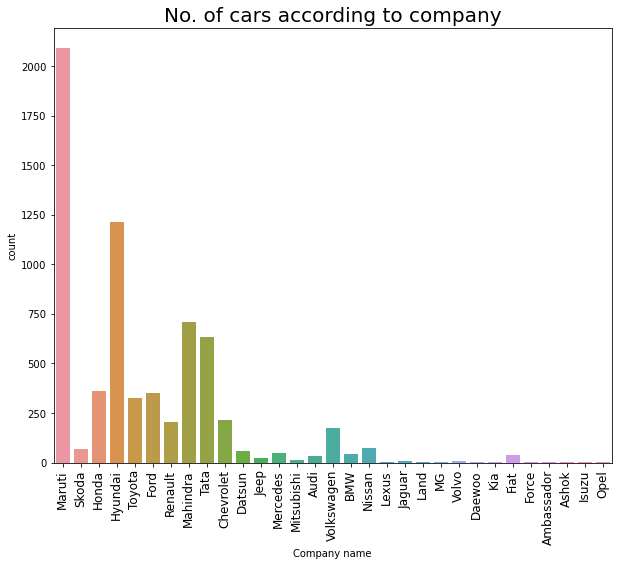

In [32]:
plt.figure(figsize=(10,8))
sns.countplot(df1['Company name'])
plt.xticks(rotation=90,color='black',size=12)
plt.title('No. of cars according to company',size=20,color='black')
plt.show()

**1. Most of the cars owned by the people are of Maruti, Hyundai, Mahindra, Tata**

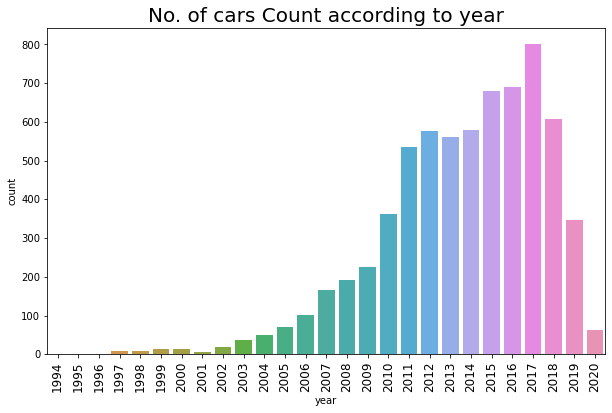

In [33]:
plt.figure(figsize=(10,6))
sns.countplot(df1.year)
plt.xticks(rotation=90,color='black',size=12)
plt.title('No. of cars Count according to year',size=20,color='black')
plt.show()

**Maximum listed cars are from year 2010 to 2019**

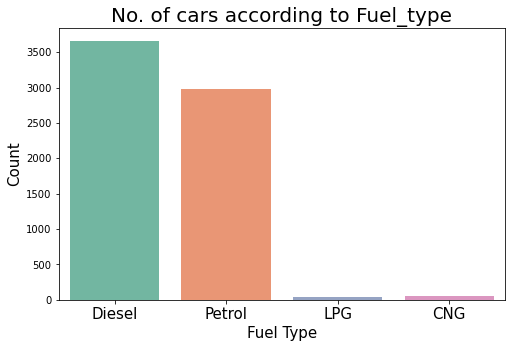

In [34]:
plt.figure(figsize=(8,5))
sns.countplot(df1.fuel,palette = "Set2")
plt.xticks(rotation=0,color='black',size=15)
plt.title('No. of cars according to Fuel_type',size=20,color='black')
plt.xlabel('Fuel Type',size = 15)
plt.ylabel('Count',size = 15)
plt.show()

#### We can see that

**1. Most of the cars owned by the people are of diesel and petrol Type.**

**2. People are buying more diesel Cars then petrol Lpg and CNG.**

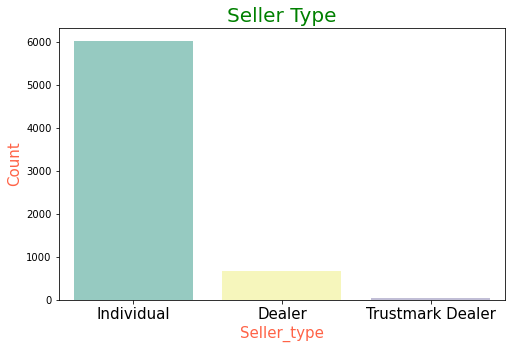

In [35]:
plt.figure(figsize=(8,5))
sns.countplot(df1.seller_type,palette = "Set3")
plt.xticks(rotation=0,color='black',size=15)
plt.title('Seller Type',size=20,color='g')
plt.xlabel('Seller_type',size = 15,color='tomato')
plt.ylabel('Count',size = 15,color='tomato')
plt.show()

**Most of the seller type is Individual only.**

**Dealers are also coming up with the help of the online marketplace.**


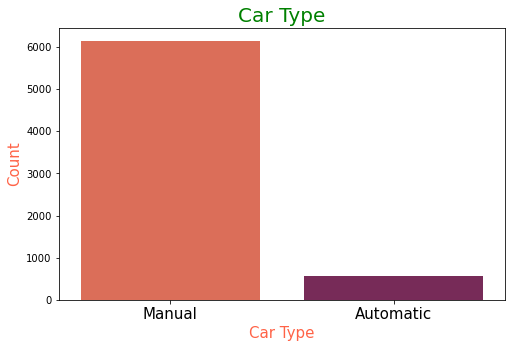

In [36]:
plt.figure(figsize=(8,5))
sns.countplot(df1.transmission,palette = "rocket_r")
plt.xticks(rotation=0,color='black',size=15)
plt.title('Car Type',size=20,color='g')
plt.xlabel('Car Type',size = 15,color='tomato')
plt.ylabel('Count',size = 15,color='tomato')
plt.show()

**Most of people owned the manual vehicle instead of Automatic**

In [37]:
import textwrap
def wrap_labels(ax, width, break_long_words=False):
    labels = []
    for label in ax.get_xticklabels():
        text = label.get_text()
        labels.append(textwrap.fill(text, width=width,
                      break_long_words=break_long_words))
    ax.set_xticklabels(labels, rotation=0)

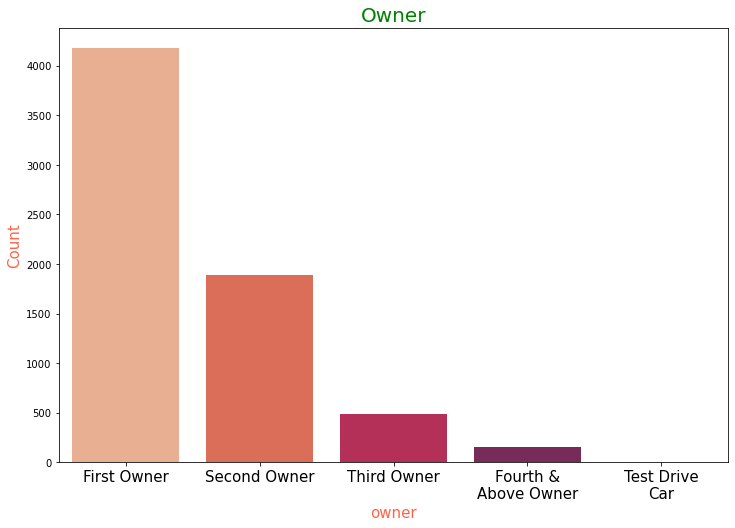

In [38]:
plt.figure(figsize=(12,8))
ax = sns.countplot(df1.owner,palette = "rocket_r")
plt.xticks(rotation=90,color='black',size=15)
plt.title('Owner',size=20,color='g')
plt.xlabel('owner',size = 15,color='tomato')
plt.ylabel('Count',size = 15,color='tomato')
wrap_labels(ax, 13)


**Most of the cars are owned by the first owner.**

**Second-hand cars are less in number.**

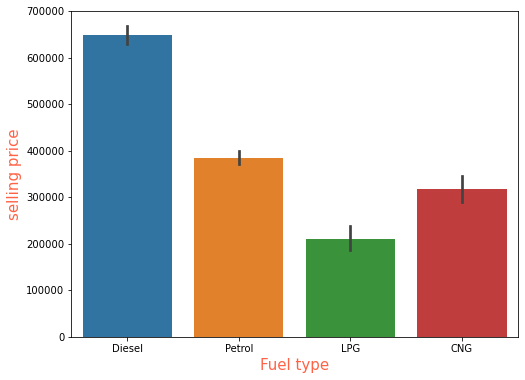

In [39]:
plt.figure(figsize=(8,6))
sns.barplot(x = 'fuel',y = 'selling_price', data = df1)
# plt.title('Owner',size=20,color='g')
plt.xlabel('Fuel type',size = 15,color='tomato')
plt.ylabel('selling price',size = 15,color='tomato')
plt.show()

**Cost of diesel cars are high compare to Petrol LPG and CNG cars**

**LPG cars are cheaper than other fuel options**

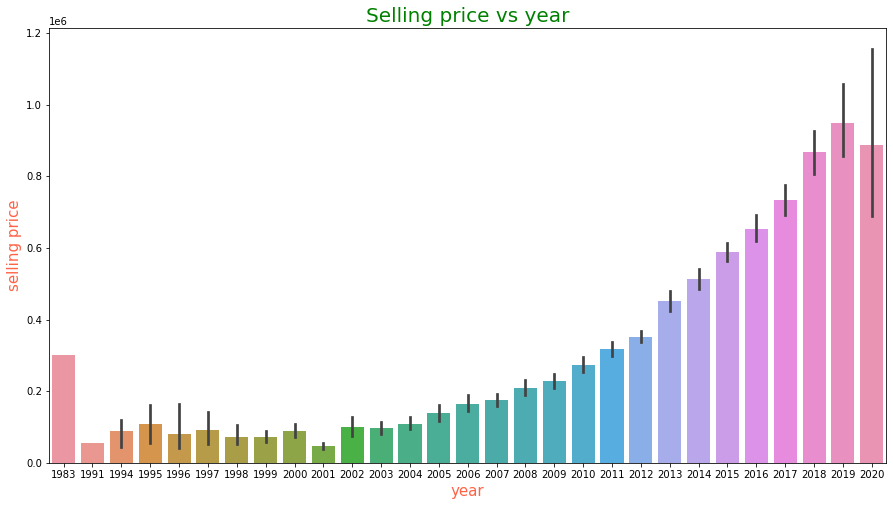

In [40]:
plt.figure(figsize=(15,8))
sns.barplot(x = 'year',y = 'selling_price', data = df)
plt.title('Selling price vs year',size=20,color='g')
plt.xlabel('year',size = 15,color='tomato')
plt.ylabel('selling price',size = 15,color='tomato')
plt.show()

**Car is newer price is higher**

**Car is older price is less**

In [41]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6717 entries, 0 to 6925
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           6717 non-null   object 
 1   Company name   6717 non-null   object 
 2   year           6717 non-null   int64  
 3   selling_price  6717 non-null   int64  
 4   km_driven      6717 non-null   int64  
 5   fuel           6717 non-null   object 
 6   seller_type    6717 non-null   object 
 7   transmission   6717 non-null   object 
 8   owner          6717 non-null   object 
 9   mileage        6717 non-null   float64
 10  engine         6717 non-null   float64
 11  max_power      6717 non-null   float64
 12  seats          6717 non-null   int64  
 13  Age_of_car     6717 non-null   int64  
dtypes: float64(3), int64(5), object(6)
memory usage: 1.0+ MB


**1. data has categorical and numerical features**


**2. Now no null values In DATA**

In [42]:
df1.describe()

,year,selling_price,km_driven,mileage,engine,max_power,seats,Age_of_car
count,6717.000000,6.717000e+03,6.717000e+03,6717.000000,6717.000000,6717.000000,6717.000000,6717.000000
mean,2013.611136,5.263860e+05,7.339834e+04,19.466585,1430.985857,87.766100,5.434271,8.388864
std,3.897402,5.235504e+05,5.870328e+04,4.048102,493.469198,31.724555,0.983805,3.897402
min,1994.000000,2.999900e+04,1.000000e+00,0.000000,624.000000,32.800000,2.000000,2.000000
25%,2011.000000,2.500000e+05,3.800000e+04,16.800000,1197.000000,67.100000,5.000000,5.000000
50%,2014.000000,4.200000e+05,6.820300e+04,19.440000,1248.000000,81.830000,5.000000,8.000000
75%,2017.000000,6.500000e+05,1.000000e+05,22.500000,1498.000000,100.000000,5.000000,11.000000
max,2020.000000,1.000000e+07,2.360457e+06,42.000000,3604.000000,400.000000,14.000000,28.000000


#### Key Observations -

1. Mean value is less than median value of each column represented by 50%(50th percentile) in index column.


2. large differnece in 75th %tile and max values of predictors "selling_price","max_power","mileage","seats"

**Thus observations 1 and 2 suggests that there are values-Outliers in our dataset**

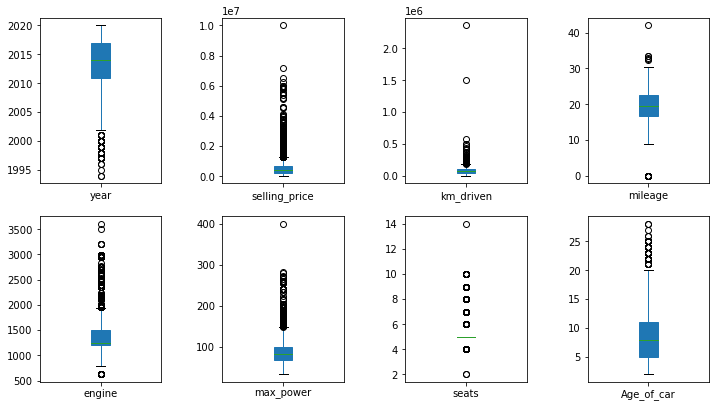

In [43]:
df1.plot(subplots=True, layout=(4,4), kind='box', figsize=(12,14), patch_artist=True)
plt.subplots_adjust(wspace=0.5);

**Selling price shows the data like outlier but depends on car features and specification it would be higher or lower

**The Kms_Driven shows that many of the data is Acting like an outlier.**

**But with the Help of domain Knowledge, we can say that the Cars can we any Kms Driven as it is based on the Owner and the Selling price of that cars Adjust accordingly.**

<AxesSubplot:ylabel='Density'>

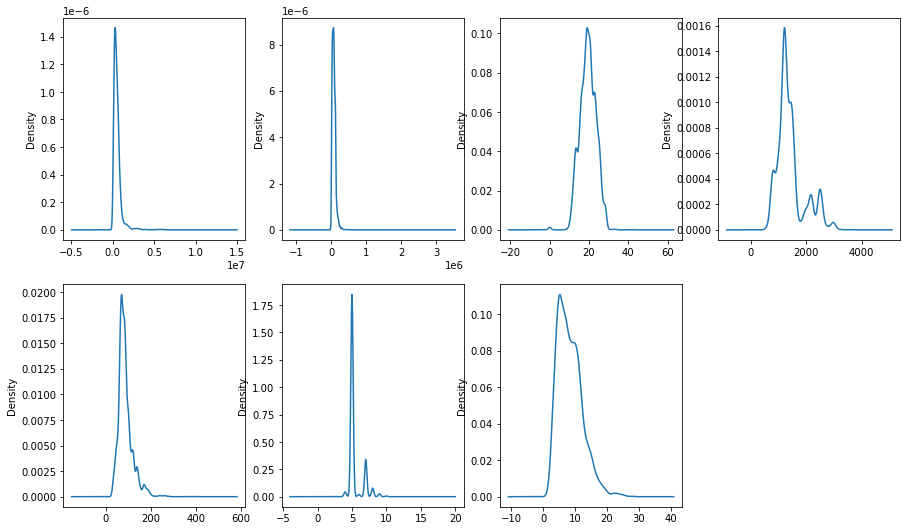

In [44]:
plt.figure(figsize=(15,9))
plt.subplot(2,4,1)
df1['selling_price'].plot(kind='kde')

plt.subplot(2,4,2)
df1['km_driven'].plot(kind='kde')

plt.subplot(2,4,3)
df1['mileage'].plot(kind='kde')

plt.subplot(2,4,4)
df1['engine'].plot(kind='kde')

plt.subplot(2,4,5)
df1['max_power'].plot(kind='kde')

plt.subplot(2,4,6)
df1['seats'].plot(kind='kde')

plt.subplot(2,4,7)
df1['Age_of_car'].plot(kind='kde')

In [45]:
df1['selling_price'] = np.log(df1['selling_price'])

In [46]:
df1['km_driven'] = np.log(df1['km_driven'])

In [53]:
df1['mileage'] = np.log(df1['mileage'])

In [48]:
df1['engine'] = np.log(df1['engine'])

In [49]:
df1['max_power'] = np.log(df1['max_power'])

In [50]:
df1['Age_of_car'] = np.log(df1['Age_of_car'])

In [54]:
df1['mileage']=df1['mileage'].fillna(df1['mileage'].mean())

<AxesSubplot:ylabel='Density'>

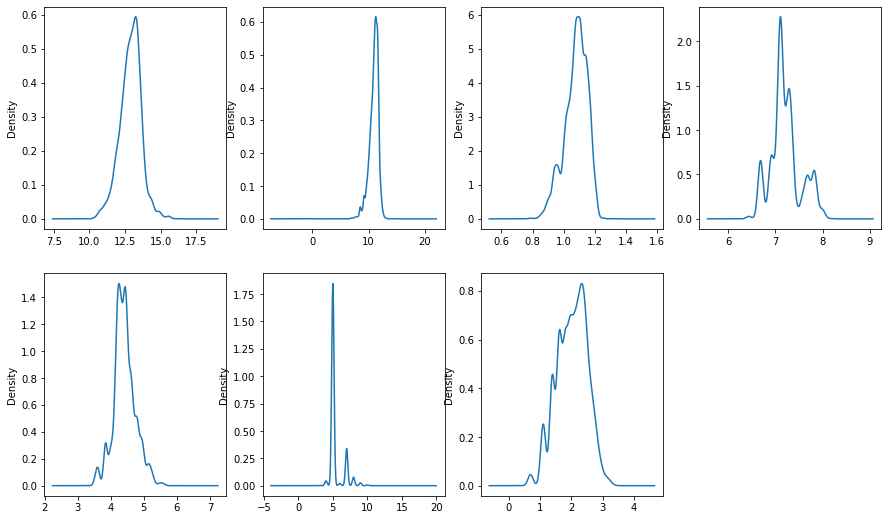

In [55]:
plt.figure(figsize=(15,9))
plt.subplot(2,4,1)
df1['selling_price'].plot(kind='kde')

plt.subplot(2,4,2)
df1['km_driven'].plot(kind='kde')

plt.subplot(2,4,3)
df1['mileage'].plot(kind='kde')

plt.subplot(2,4,4)
df1['engine'].plot(kind='kde')

plt.subplot(2,4,5)
df1['max_power'].plot(kind='kde')

plt.subplot(2,4,6)
df1['seats'].plot(kind='kde')

plt.subplot(2,4,7)
df1['Age_of_car'].plot(kind='kde')

In [56]:
df1.drop(['year','name','Company name'],axis=1,inplace=True)

### Understanding the variables and use the correlation matrix to make the process easy

<AxesSubplot:>

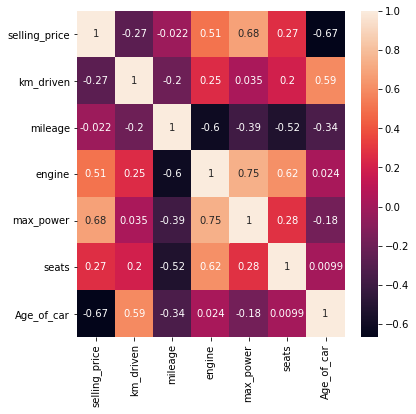

In [57]:
plt.figure(figsize=(6,6))
sns.heatmap(df1.corr(),annot=True)

In [58]:
df1.corr()['selling_price']


selling_price    1.000000
km_driven       -0.272068
mileage         -0.021773
engine           0.510683
max_power        0.681675
seats            0.268454
Age_of_car      -0.667678
Name: selling_price, dtype: float64

### Model building

In [59]:
df1.head(2)

,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,Age_of_car
0,13.017003,11.887931,Diesel,Individual,Manual,First Owner,1.148271,7.129298,4.304065,5,2.079442
1,12.821258,11.695247,Diesel,Individual,Manual,Second Owner,1.115524,7.311886,4.639765,5,2.079442


In [60]:
df_main = pd.get_dummies(data = df1,drop_first=True)

In [61]:
df_main.head()

,selling_price,km_driven,mileage,engine,max_power,seats,Age_of_car,fuel_Diesel,fuel_LPG,fuel_Petrol,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Manual,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner
0,13.017003,11.887931,1.148271,7.129298,4.304065,5,2.079442,1,0,0,1,0,1,0,0,0,0
1,12.821258,11.695247,1.115524,7.311886,4.639765,5,2.079442,1,0,0,1,0,1,0,1,0,0
2,11.970350,11.849398,1.055553,7.311218,4.356709,5,2.772589,0,0,1,1,0,1,0,0,0,1
3,12.323856,11.751942,1.142787,7.241366,4.499810,5,2.484907,1,0,0,1,0,1,0,0,0,0
4,11.775290,11.695247,1.022026,7.168580,4.479607,5,2.708050,0,0,1,1,0,1,0,0,0,0


In [62]:
x=df_main.drop(['selling_price'],axis=1)
y=df_main.selling_price

In [63]:
print(x.shape)
print(y.shape)

(6717, 16)
(6717,)


In [64]:
from sklearn.model_selection import train_test_split

In [65]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3,random_state = 100)
print("x train: ",x_train.shape)
print("x test: ",x_test.shape)
print("y train: ",y_train.shape)
print("y test: ",y_test.shape)

x train:  (4701, 16)
x test:  (2016, 16)
y train:  (4701,)
y test:  (2016,)


## Random Forest

In [79]:
# importing random forest model
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor()

# fit training data in to the MODEL
rf.fit(x_train, y_train)

# predict using test data 
pred=rf.predict(x_test)
# predict using train data 
train_pred= rf.predict(x_train)

print("R2 Score and Mse using test data")
print(r2_score(y_test,pred)*100,)
print(mean_squared_error(y_test,pred)*100)

print("-----------------------------------")
print("-----------------------------------")

print("R2 Score and Mse using train data")
print(r2_score(y_train,train_pred)*100)
print(mean_squared_error(y_train,train_pred)*100)

R2 Score and Mse using test data
91.25423538826938
4.932070890928016
-----------------------------------
-----------------------------------
R2 Score and Mse using train data
98.57683903075795
0.8004215454936618


# Hyperparameter Tuning

In [83]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV

rfh = RandomForestRegressor()

# Number of trees in Random forest
n_estimators=list(range(500,1000,100))
# Maximum number of levels in a tree
max_depth=list(range(4,9,4))
# Minimum number of samples required to split an internal node
min_samples_split=list(range(4,9,2))
# Minimum number of samples required to be at a leaf node.
min_samples_leaf=[1,2,5,7]
# Number of fearures to be considered at each split
max_features=['auto','sqrt']

# Hyperparameters dict
param_grid = {"n_estimators":n_estimators,
              "max_depth":max_depth,
              "min_samples_split":min_samples_split,
              "min_samples_leaf":min_samples_leaf,
              "max_features":max_features}

rf_rs = RandomizedSearchCV(estimator = rf, param_distributions = param_grid)

In [86]:
# fit training data in to the MODEL
pred =rf_rs.fit(x_train, y_train)

# predict using test data 
pred=rf_rs.predict(x_test)
# predict using train data 
train_pred= rf_rs.predict(x_train)

print("R2 Score and Mse using test data")
print(r2_score(y_test,pred)*100,)
print(mean_squared_error(y_test,pred)*100)

print("-----------------------------------")
print("-----------------------------------")

print("R2 Score and Mse using train data")
print(r2_score(y_train,train_pred)*100)
print(mean_squared_error(y_train,train_pred)*100)

R2 Score and Mse using test data
89.80920451871489
5.746979021277497
-----------------------------------
-----------------------------------
R2 Score and Mse using train data
92.55131806836702
4.189326177757461


In machine learning, specifically empirical risk minimization, MSE may refer to the empirical risk (the average loss on an observed data set), as an estimate of the true MSE (the true risk: the average loss on the actual population distribution). The MSE is a measure of the quality of an estimator.

# Gradient boosting

In [68]:

from sklearn.ensemble import GradientBoostingRegressor
gb = GradientBoostingRegressor()
gb.fit(x_train, y_train)
pred=gb.predict(x_test)
print(r2_score(y_test,pred)*100)
print(mean_squared_error(y_test,pred)*100)

89.53166626799806
5.903493447202427


# DecisionTreeRegressor

In [91]:

from sklearn.tree import DecisionTreeRegressor

regressor = DecisionTreeRegressor(random_state = 0)

regressor.fit(x_train, y_train)

pred=regressor.predict(x_test)

train_pred= regressor.predict(x_train)


print("R2 Score and Mse using test data")
print(r2_score(y_test,pred)*100,)
print(mean_squared_error(y_test,pred)*100)

print("-----------------------------------")
print("-----------------------------------")

print("R2 Score and Mse using train data")
print(r2_score(y_train,train_pred)*100)
print(mean_squared_error(y_train,train_pred)*100)

R2 Score and Mse using test data
84.16279777385698
8.931203566642044
-----------------------------------
-----------------------------------
R2 Score and Mse using train data
99.82779280156835
0.09685366230019803


# LinearRegression

In [89]:

from sklearn.linear_model import LinearRegression
lr=LinearRegression()

lr.fit(x_train, y_train)

pred=lr.predict(x_test)

train_pred= lr.predict(x_train)

from sklearn.metrics import r2_score,mean_squared_error

print("R2 Score and Mse using test data")
print(r2_score(y_test,pred)*100,)
print(mean_squared_error(y_test,pred)*100)

print("-----------------------------------")
print("-----------------------------------")

print("R2 Score and Mse using train data")
print(r2_score(y_train,train_pred)*100)
print(mean_squared_error(y_train,train_pred)*100)


R2 Score and Mse using test data
82.83412639644949
9.680492132599
-----------------------------------
-----------------------------------
R2 Score and Mse using train data
82.15416269098365
10.036948025014256
